In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_im
import cv2
import cv2 as cv


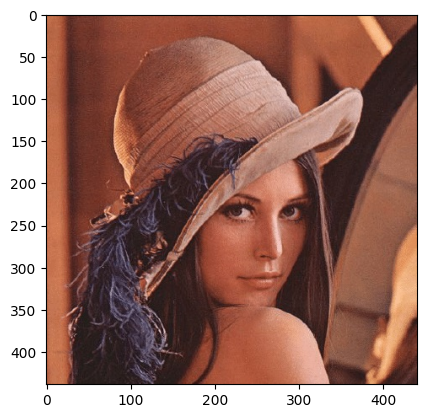

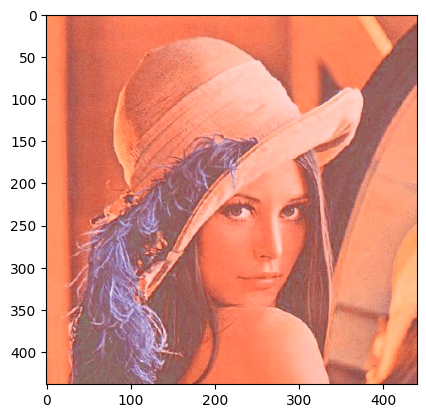

In [2]:
#getting the Cyan color, just to ensure that we can print an RGB image which usees YCN

def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v, = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h,s,v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img



Lena = cv2.imread('lena.png')
LenaImageRGB = cv2.cvtColor(Lena, cv2.COLOR_BGR2RGB)

value = 100#int(input())
FinalLenaImageBGR = increase_brightness(Lena, value)
FinalLenaImageRGB = cv2.cvtColor(FinalLenaImageBGR, cv2.COLOR_BGR2RGB)

plt.imshow(LenaImageRGB)
plt.show()
plt.imshow(FinalLenaImageRGB)
plt.show()




In [3]:
Flamigo = cv2.imread('flamigo.jpg')
FlamigoRGB = cv2.cvtColor(Flamigo, cv2.COLOR_BGR2RGB)

alpha_slider_max = 255
title_window = "Slider"

def nothing(x):
    pass

def increase_brightness(imBGR, value, R_min, G_min, B_min, R_max, G_max, B_max):
    hsv = cv2.cvtColor(imBGR, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))

    imBGR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
    LowerRegion = np.array([R_min,G_min,B_min], np.uint8)
    upperRegion = np.array([R_max,G_max,B_max], np.uint8)

    mask = cv2.inRange(imRGB, LowerRegion, upperRegion)    
    result = cv2.bitwise_and(imRGB, imRGB, mask = mask)
    
    imBGR = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

    return imBGR



cv2.namedWindow("Brightened_Image")
cv2.createTrackbar("Brightened_Factor","Brightened_Image", 0, 255, nothing)
cv2.createTrackbar("R_min","Brightened_Image", 1, 255, nothing)
cv2.createTrackbar("G_min","Brightened_Image", 1, 255, nothing)
cv2.createTrackbar("B_min","Brightened_Image", 1, 255, nothing)
cv2.createTrackbar("R_max","Brightened_Image", 255, 255, nothing)
cv2.createTrackbar("G_max","Brightened_Image", 255, 255, nothing)
cv2.createTrackbar("B_max","Brightened_Image", 255, 255, nothing)



while(1):

    brightness_factor = cv2.getTrackbarPos("Brightened_Factor", "Brightened_Image")
   

    R_min =  cv2.getTrackbarPos("R_min", "Brightened_Image")
    G_min =  cv2.getTrackbarPos("G_min", "Brightened_Image")
    B_min =  cv2.getTrackbarPos("B_min", "Brightened_Image")
    R_max =  cv2.getTrackbarPos("R_max", "Brightened_Image")
    G_max =  cv2.getTrackbarPos("G_max", "Brightened_Image")
    B_max =  cv2.getTrackbarPos("B_max", "Brightened_Image")
    


    brightenedBGR = increase_brightness(Flamigo, brightness_factor, R_min, G_min, B_min, R_max, G_max, B_max)

    brightenedBGR_scaled = cv2.resize(brightenedBGR, [1259,944])
    cv2.imshow('Brightened_Image', brightenedBGR)


    if cv2.waitKey(1) & 0xFF == 27:
        cv2.imwrite('brightened_flamigo.jpeg', brightenedBGR)

        break

cv2.destroyAllWindows  
             




<function destroyAllWindows>

: 